# Python libraries for raster data

This notebook based on content from previous geohackweek raster tutorials https://github.com/geohackweek/raster

<div class="alert-info">

### Overview
    
* **teaching:** 15 minutes
* **exercises:** 0
* **questions:**
    * What python libraries can I use to work with raster data?
* **objectives:**
    * Understand the relationship between numpy, rasterio, and GDAL
  
</div>

### Table of contents

1. [**Numpy**](#Numpy)
1. [**Rasterio**](#Rasterio)
1. [**Image and world coordinates**](#Image-and-world-coordinates)
1. [**Other libraries**](#Image-and-World-coordinates)

## NumPy

A simple raster is a 2-dimensional array of values.  A multi-band raster (e.g., RGB image) can be represented as a 3-dimensional array (three 2D arrays with identical dimensions). Either way, we are working with rectangular arrays (matrices) of pixel values, which in the
Python programming language are usually represented by [NumPy](http://numpy.org) arrays.

For this tutorial, we'll perform basic operations with NumPy arrays extracted from geospatial rasters.  For more information about multidimensional array analysis, take a look at the geohackweek tutorial on [N-Dimensional Arrays](https://geohackweek.github.io/nDarrays).

In [1]:
# Create raster data
import numpy as np

#Number of rows and columns
nx = 60
ny = 45
x = np.linspace(-4.0, 4.0, nx)
y = np.linspace(-3.0, 3.0, ny)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)

In [3]:
print(type(Z))
Z

<class 'numpy.ndarray'>


array([[0.02122529, 0.02892972, 0.03895127, ..., 0.00325789, 0.00221092,
        0.00148217],
       [0.02646584, 0.0360725 , 0.04856839, ..., 0.00406227, 0.0027568 ,
        0.00184812],
       [0.03259447, 0.04442573, 0.05981526, ..., 0.00500296, 0.00339519,
        0.00227609],
       ...,
       [0.00530875, 0.00723575, 0.00974228, ..., 0.00081484, 0.00055298,
        0.00037071],
       [0.00393665, 0.00536559, 0.00722429, ..., 0.00060424, 0.00041006,
        0.0002749 ],
       [0.00288328, 0.00392987, 0.00529121, ..., 0.00044256, 0.00030034,
        0.00020134]])

In [6]:
# Numpy arrays permit all kinds of operations on our raster data, some of the most common are:

# indexing
print('value at Z[25,20]: ', Z[25,20])

value at Z[25,20]:  6.060251397244279


In [7]:
# slicing
print('first row, last 3 values: ', Z[0,-3:])

first row, last 3 values:  [0.00325789 0.00221092 0.00148217]


In [8]:
# math
print('mean of all values: ', np.mean(Z))

mean of all values:  1.396442793554628


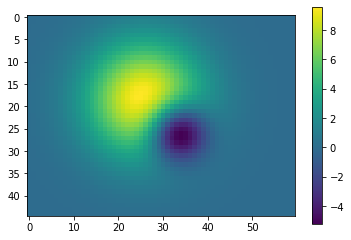

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize with matplotlib
plt.imshow(Z, origin='upper', interpolation='none')
plt.colorbar();

## Rasterio

An excellent python library supported by Mapbox is [rasterio](https://rasterio.readthedocs.io/en/latest/). Rasterio provides a "Pythonic" interface to GDAL and supports most of the features and formats that GDAL supports. Both GDAL and rasterio are constantly being updated and improved. Rasterio uses numpy arrays to represent raster data. It also uses the [PROJ](https://github.com/OSGeo/PROJ) library and GDAL to manage geospatial operations.

<div class="alert-warning">

#### Pay attention to compatible versions
    
* As of writing this tutorial (September 2019), GDAL is at version 3.0.1 and rasterio is at version 1.0.26.  *`rasterio 1.x` requires `GDAL <3` and `PROJ<6`*. 

</div>


In the example below use rasterio to assign a CRS and geotransform to the data we just created. The coordinate reference system will be '+proj=latlong', which describes an equirectangular coordinate reference system with units of decimal degrees. The affine transformation matrix can be computed from the matrix product of a translation and a scaling:

In [9]:
# Create Affine geotransformation
from rasterio.transform import Affine

res = (x[-1] - x[0]) / 240.0
ulx = x[0] - res / 2
uly = y[-1] - res / 2
transform = Affine.translation(ulx, uly) * Affine.scale(res, -res)
transform

Affine(0.03333333333333333, 0.0, -4.016666666666667,
       0.0, -0.03333333333333333, 2.9833333333333334)

In [10]:
# Save as a Geotiff
import rasterio

with rasterio.open('example.tif', 'w',
                    driver='GTiff',
                    height=Z.shape[0],
                    width=Z.shape[1],
                    count=1,
                    dtype=Z.dtype,
                    crs='+proj=latlong', # this is a "proj4" string defining the projection
                    transform=transform,
                    ) as dst:
    dst.write(Z, 1)

In [11]:
!ls -lh

total 2.7M
-rw-r--r-- 1 jovyan jovyan  12K Sep 10 15:46 0-introduction.ipynb
-rw-r--r-- 1 jovyan jovyan  18K Sep 10 16:06 1-formats-and-gdal.ipynb
-rw-r--r-- 1 jovyan jovyan  24K Sep 10 16:13 2-numpy-and-rasterio.ipynb
-rw-r--r-- 1 jovyan jovyan 7.7K Sep 10 15:46 3-visualization-and-modis.ipynb
-rw-r--r-- 1 jovyan jovyan  23K Sep 10 15:46 4-landsat8.ipynb
-rw-r--r-- 1 jovyan jovyan  17K Sep 10 15:46 5-sentinel2.ipynb
-rw-r--r-- 1 jovyan jovyan  13K Sep 10 15:46 6-digitalglobe.ipynb
-rw-r--r-- 1 jovyan jovyan 2.6M Sep 10 15:46 7-multidimensional-xarray-dask.ipynb
-rw-r--r-- 1 jovyan jovyan  22K Sep 10 16:14 example.tif
-rw-r--r-- 1 jovyan jovyan  20K Sep 10 16:05 LC08_L1TP_042034_20170616_20170629_01_T1_B4.vrt


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 60, 'height': 45, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.03333333333333333, 0.0, -4.016666666666667,
       0.0, -0.03333333333333333, 2.9833333333333334), 'tiled': False, 'interleave': 'band'}


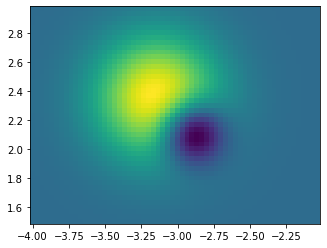

In [12]:
# Load the file into memory and plot
import rasterio.plot
with rasterio.open('example.tif') as src:
    print(src.profile)
    rasterio.plot.show(src)

## Image and world coordinates

We now have the same array but with georeferenced coordinates. We often know the georeferenced coordinates of a position of interest, but not the image (row,col) of that position in a raster rasterio helps us manage our two sets of 'image' and 'world' coordinates:

In [13]:
# Note that with rasterio if we read the data into memory, we get our numpy array back
with rasterio.open('example.tif') as src:
    data = src.read()

In [14]:
# But rasterio appends an additional dimension corresponding to the raster band
print(type(data))
print(data)
print(data.shape)

<class 'numpy.ndarray'>
[[[0.02122529 0.02892972 0.03895127 ... 0.00325789 0.00221092 0.00148217]
  [0.02646584 0.0360725  0.04856839 ... 0.00406227 0.0027568  0.00184812]
  [0.03259447 0.04442573 0.05981526 ... 0.00500296 0.00339519 0.00227609]
  ...
  [0.00530875 0.00723575 0.00974228 ... 0.00081484 0.00055298 0.00037071]
  [0.00393665 0.00536559 0.00722429 ... 0.00060424 0.00041006 0.0002749 ]
  [0.00288328 0.00392987 0.00529121 ... 0.00044256 0.00030034 0.00020134]]]
(1, 45, 60)


In [15]:
lon, lat = -3.33, 2.13
with rasterio.open('example.tif') as src:
    row, col = src.index(lon, lat) # spatial --> image coordinates
    val = src.read(1)[row,col] # band 1, value at row,col

print('(Lon,Lat), (Row,Col), Value: ', (lon,lat), (row,col), val)

(Lon,Lat), (Row,Col), Value:  (-3.33, 2.13) (25, 20) 6.060251397244279


## Other libraries

This just scratches the surface of GDAL, NumPy and Rasterio, but hopefully demonstrates the relationship between these foundational libraries. Many other libraries exist in the fields of raster geoprocessing (which would include hydrological routing and other routines needed for Earth Systems Sciences) and digital signal processing (including image classification, pattern recognition, and feature extraction).

<div class="alert-info">

## key points 

  - Rasterio is built around the GDAL library to facilitate raster operations in Python
  - Pixel values of rasters can be extracted to a numpy array for computation with Python
    
</div>